In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import json

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams.update({
    # Fonts (PRL / Nature-like)
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "Computer Modern Roman"],
    "mathtext.fontset": "cm",

    # Font sizes
    "font.size": 11,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,

    # Axes appearance
    "axes.linewidth": 1.0,
    "axes.edgecolor": "black",
    "axes.labelpad": 4,

    # Ticks
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,
    "xtick.major.width": 0.8,
    "ytick.major.width": 0.8,
    "xtick.minor.width": 0.6,
    "ytick.minor.width": 0.6,

    # Colorbar
    "image.cmap": "viridis_r",

    # Figure
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "savefig.bbox": "tight",
})

In [158]:
from pathlib import Path


def load_2d_spec_data(file_path):
    """
    Load 2D spectroscopy data from a JSON file.
    
    Parameters:
    -----------
    file_path : str
        Path to the JSON file containing the spectroscopy data
        
    Returns:
    --------
    tuple
        (detunings, amplitudes, states) as lists from the JSON file
    """
    
    folder_path = Path("/Users/asafsolonnikov/Developer/amplitude-robust-spectroscopy/figures/data/2025-09-17/")
    
    file_path = folder_path / file_path
    with open(file_path, 'r') as f:
        data = f.read()
    params = json.loads(data)
    
    states = params['measured_data']['states']
    sweep_parameters = params['sweep_parameters']
    detunings = np.array(sweep_parameters['detuning'])
    amplitudes = sweep_parameters['amplitudes']
    
    return detunings/1e6, amplitudes, states



def load_2d_spec_sim(file_name):
    folder_path = Path("/Users/asafsolonnikov/Developer/amplitude-robust-spectroscopy/data/2d_sweep/")
    file_path = folder_path / file_name
    data = np.load(file_path, allow_pickle=True)
    
    detunings = data['detunings']
    amplitudes = data['amplitudes']
    states = data['states']
    
    return detunings/2/np.pi/params.T2_limit/2, amplitudes/2/np.pi/1e6, states
    
# file_name1 = 'lorentzian-echo-False-2d-200.0-us-0.9999.json'
# file_name2 = 'lorentzian-echo-False-2d-50.0-us-0.0002.json'
# file_name3 = 'lorentzian-echo-True-2d-50.0-us-0.0002.json'

# detunings1, amplitudes1, states1 = load_2d_spec_data(file_name1)
# detunings2, amplitudes2, states2 = load_2d_spec_data(file_name2)
# detunings3, amplitudes3, states3 = load_2d_spec_data(file_name3)


detunings1, amplitudes1, states1 = load_2d_spec_sim('const.npz')
detunings2, amplitudes2, states2 = load_2d_spec_sim('lorentzian.npz')
detunings3, amplitudes3, states3 = load_2d_spec_sim('echo_lorentzian.npz')


In [132]:
from echospec.experiments.spectroscopy_vs_amplitude import AmplitudeSweepSpectroscopy
from echospec.experiments.spectrsocopy_vs_amplitude_vs_cutoff import OptionsSpectroscopy2d
from echospec.utils.parameters import Parameters
from echospec.utils.units import Units as u

options = OptionsSpectroscopy2d(plot=True)
options.num_time_points = 1000
options.plot = True
options.noise = 0.02


params = Parameters()
params.eco_pulse = False
params.pulse_length = 100*u.us
params.cutoff = 0.999


detunings = np.linspace(-0.5, 0.5, 151)*2*np.pi*u.MHz
amplitudes = np.linspace(0, 0.50, 151)*2*np.pi*u.MHz

spectroscopy = AmplitudeSweepSpectroscopy(
    amplitudes=amplitudes,
    detunings=detunings,
    params=params,
    options=options
)

results = spectroscopy.run()

amplitudes = results.amplitudes 
detunings = results.detunings
states = results.populations

np.savez(
    'data/2d_sweep/const.npz',
    amplitudes=amplitudes,
    detunings=detunings,
    states=states
    )


plt.pcolormesh(detunings/params.T2_limit/2/np.pi, amplitudes/u.MHz/2/np.pi, states, shading='auto', cmap='viridis')




Amplitude sweep:   0%|          | 0/151 [00:00<?, ?Ω/s]

Process ForkProcess-11348:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/concurrent/futures/process.py", line 246, in _process_worker
    call_item = call_queue.get(block=True)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py", line 103, in get
    res = self._recv_bytes()
          ^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/connection.py", line 215, in recv_bytes
    buf = self._recv_bytes(maxlength)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Framework

KeyboardInterrupt: 

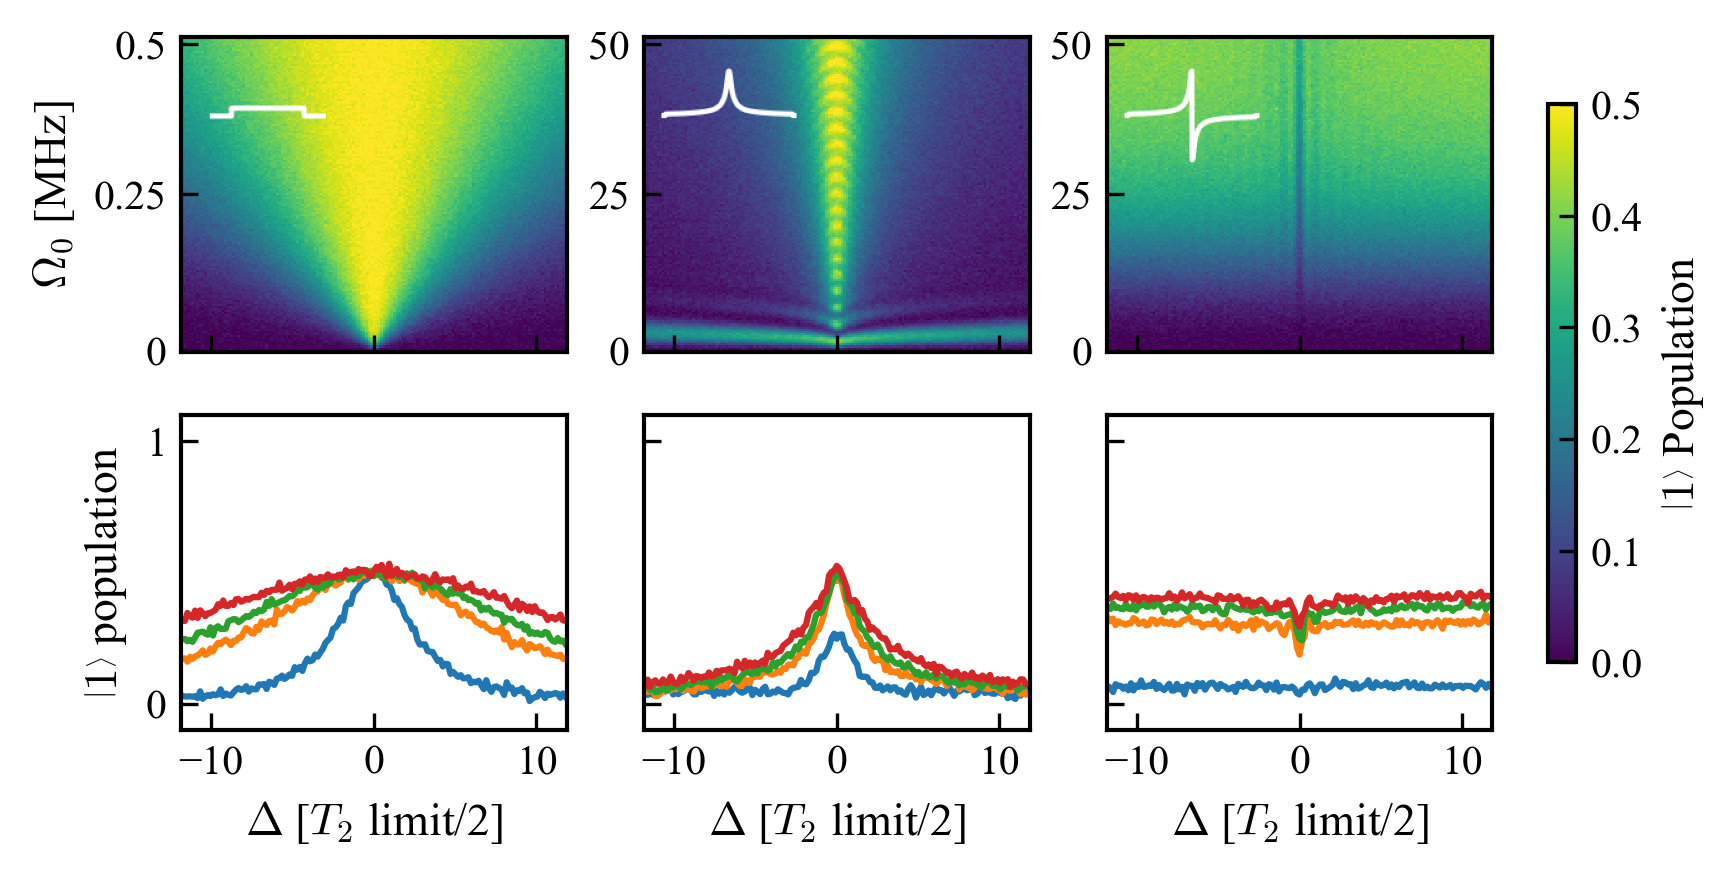

In [227]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

fig,axs = plt.subplots(2,3,figsize=(6,3),sharex=True)

im0 = axs[0,0].pcolormesh(detunings1, amplitudes1, states1, shading='auto', cmap='viridis',vmin = 0, vmax=0.5)
im1 = axs[0,1].pcolormesh(detunings2, amplitudes2, states2, shading='auto', cmap='viridis',vmin = 0, vmax=0.5)
im2 = axs[0,2].pcolormesh(detunings3, amplitudes3, states3, shading='auto', cmap='viridis',vmin = 0, vmax=0.5)

cbar = fig.colorbar(im0, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label(r'$\left|1\right\rangle$ Population')

idx = [25,75,100,139]

axs[0,0].set_yticks([0,0.25,0.49],labels = ['0','0.25','0.5'])
axs[0,1].set_yticks([0,25,49],labels = ['0','25','50'])
axs[0,2].set_yticks([0,25,49],labels = ['0','25','50'])

# for i in [0,1,2]:
axs[1,0].set_yticks([0,1],labels = [r'0','1'])
axs[1,1].set_yticks([0,1],labels = ['',''])
axs[1,2].set_yticks([0,1],labels = ['',''])



for i in idx:
    axs[1, 0].plot(detunings1, states1[i])
    axs[1, 1].plot(detunings2, states2[i])
    axs[1, 2].plot(detunings3, states3[i])

axs[0,0].set_ylabel(r"$\Omega_0$ [MHz]")
axs[1,0].set_ylabel(r"$\left|1\right\rangle$ population")
for ax in axs[1,:]:
    ax.set_xlabel(r"$\Delta$ [$T_2$ limit/2]")
    # ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.1, 1.1)

import matplotlib.image as mpimg

img1 = mpimg.imread("square_measurement_pulse_transparent.png", format='svg')
img2 = mpimg.imread("lorentzian_pulse_transparent.png", format='svg')
img3 = mpimg.imread("lorentzian_flip_pulse_transparent.png", format='svg')
# # Load and place images in the upper corners
# img1 = Image.open('square_measurement_pulse_transparent.svg')
# img2 = Image.open('lorentzian_pulse_transparent.svg')
# img3 = Image.open('lorentzian_flip_pulse_transparent.svg')

images = [img1, img2, img3]

for col, img in enumerate(images):
    img_array = np.array(img)
    # Convert to grayscale/black for second row
    img_array_bw = np.zeros_like(img_array)
    if img_array.shape[-1] == 4:  # RGBA
        img_array_bw[:, :, 3] = img_array[:, :, 3]  # Keep alpha channel
    imagebox_bw = OffsetImage(img_array_bw, zoom=0.3)
    # ab_bw = AnnotationBbox(imagebox_bw, (0.22, 0.8), xycoords='axes fraction', 
    #                     frameon=False)
    # axs[1, col].add_artist(ab_bw)
    imagebox = OffsetImage(img_array, zoom=0.3)
    ab = AnnotationBbox(imagebox, (0.22, 0.75), xycoords='axes fraction', 
                        frameon=False)
    axs[0, col].add_artist(ab)
    
    

plt.savefig('figures/2d_spectroscopy_comparison.png', dpi=300)